In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'c:\\Users\\sjasm\\Documents\\EV_data_analysis\\notebooks and experiments'

In [3]:
os.chdir('../')

In [4]:
pwd

'c:\\Users\\sjasm\\Documents\\EV_data_analysis'

In [386]:
df_orig = pd.read_csv('datasets/Car details v3.csv')

In [387]:
df_orig.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine (CC),max_power(bhp),torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [388]:
df_orig.shape

(8128, 13)

### Basic Insights and Preprocessing

In [389]:
df_orig.isnull().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           221
engine (CC)       221
max_power(bhp)    222
torque            222
seats             221
dtype: int64

In [390]:
df = df_orig.drop(['mileage', 'owner', 'torque', 'seller_type', 'year'],axis=1)

In [391]:
df.head()

,name,selling_price,km_driven,fuel,transmission,engine (CC),max_power(bhp),seats
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Manual,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Manual,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Manual,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Manual,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Manual,1298.0,88.20,5.0


In [392]:
df.dropna(inplace=True)

In [393]:
df.isnull().sum()

name              0
selling_price     0
km_driven         0
fuel              0
transmission      0
engine (CC)       0
max_power(bhp)    0
seats             0
dtype: int64

In [394]:
df.dtypes

name               object
selling_price       int64
km_driven           int64
fuel               object
transmission       object
engine (CC)       float64
max_power(bhp)    float64
seats             float64
dtype: object

In [395]:
df.describe()

,selling_price,km_driven,engine (CC),max_power(bhp),seats
count,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000
mean,6.498137e+05,6.918866e+04,1458.708829,91.587378,5.416393
std,8.135827e+05,5.679230e+04,503.893057,35.747218,0.959208
min,2.999900e+04,1.000000e+00,624.000000,32.800000,2.000000
25%,2.700000e+05,3.500000e+04,1197.000000,68.050000,5.000000
50%,4.500000e+05,6.000000e+04,1248.000000,82.000000,5.000000
75%,6.900000e+05,9.542500e+04,1582.000000,102.000000,5.000000
max,1.000000e+07,2.360457e+06,3604.000000,400.000000,14.000000


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            7906 non-null   object 
 1   selling_price   7906 non-null   int64  
 2   km_driven       7906 non-null   int64  
 3   fuel            7906 non-null   object 
 4   transmission    7906 non-null   object 
 5   engine (CC)     7906 non-null   float64
 6   max_power(bhp)  7906 non-null   float64
 7   seats           7906 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 555.9+ KB


In [397]:
df.shape

(7906, 8)

In [398]:
##dummies for categorical data
df_fuel_encoded = pd.get_dummies(df['fuel'])

In [399]:
#x  = lambda a: 1 if a else 0

In [400]:
df_fuel_encoded.head()
#df_fuel_encoded = df_fuel_encoded.applymap(x)

,CNG,Diesel,LPG,Petrol
0,False,True,False,False
1,False,True,False,False
2,False,False,False,True
3,False,True,False,False
4,False,False,False,True


In [401]:
df_transmission_encoded =  pd.get_dummies(df['transmission'])

In [402]:
#df_transmission_encoded = df_transmission_encoded.applymap(x).head()

In [403]:
df_processed = pd.concat([df, df_fuel_encoded, df_transmission_encoded], axis=1)

In [404]:
#df_processed.drop(['fuel', 'transmission', 'seats'],axis=1, inplace=True)

In [405]:
df_processed.head()

,name,selling_price,km_driven,fuel,transmission,engine (CC),max_power(bhp),seats,CNG,Diesel,LPG,Petrol,Automatic,Manual
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Manual,1248.0,74.00,5.0,False,True,False,False,False,True
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Manual,1498.0,103.52,5.0,False,True,False,False,False,True
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Manual,1497.0,78.00,5.0,False,False,False,True,False,True
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Manual,1396.0,90.00,5.0,False,True,False,False,False,True
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Manual,1298.0,88.20,5.0,False,False,False,True,False,True


In [406]:
df_processed.describe()

,selling_price,km_driven,engine (CC),max_power(bhp),seats
count,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000
mean,6.498137e+05,6.918866e+04,1458.708829,91.587378,5.416393
std,8.135827e+05,5.679230e+04,503.893057,35.747218,0.959208
min,2.999900e+04,1.000000e+00,624.000000,32.800000,2.000000
25%,2.700000e+05,3.500000e+04,1197.000000,68.050000,5.000000
50%,4.500000e+05,6.000000e+04,1248.000000,82.000000,5.000000
75%,6.900000e+05,9.542500e+04,1582.000000,102.000000,5.000000
max,1.000000e+07,2.360457e+06,3604.000000,400.000000,14.000000


In [407]:
df_processed.shape

(7906, 14)

### Descriptive Statistics

Boxplot for selling price

<Axes: xlabel='selling_price'>

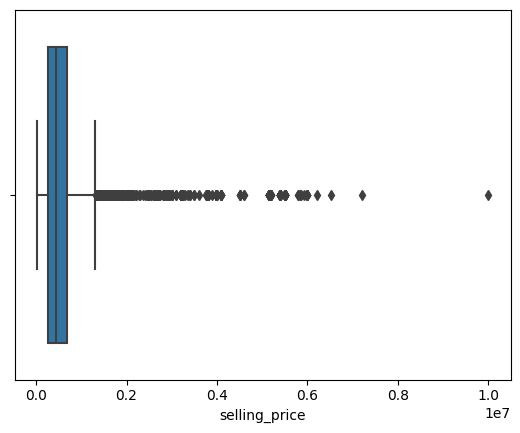

In [408]:
sns.boxplot(x = 'selling_price', data = df_processed)

In [409]:
df_processed = df_processed[df_processed['selling_price'] != df_processed['selling_price'].max()]

In [410]:
df['selling_price'].max()

10000000

In [411]:
df_processed = df_processed[df_processed['selling_price'] != df_processed['selling_price'].max()]

In [412]:
df['selling_price'].max()

10000000

<Axes: xlabel='selling_price'>

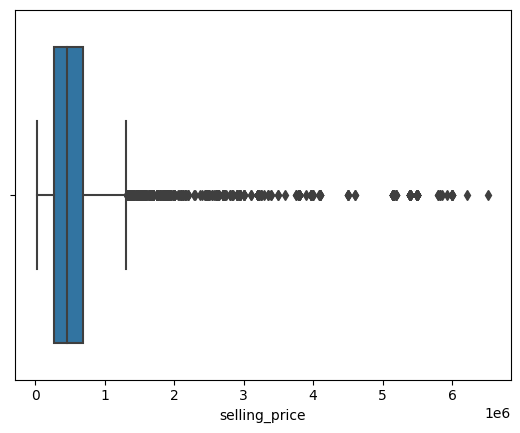

In [413]:
sns.boxplot(x = 'selling_price', data = df_processed)

Scatter plot b/w selling price and kms driven

Univariate Analysis:

C:\Users\sjasm\AppData\Local\Temp\ipykernel_7804\219638071.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_processed[column], ax = ax)
C:\Users\sjasm\AppData\Local\Temp\ipykernel_7804\219638071.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_processed[column], ax = ax)
C:\Users\sja

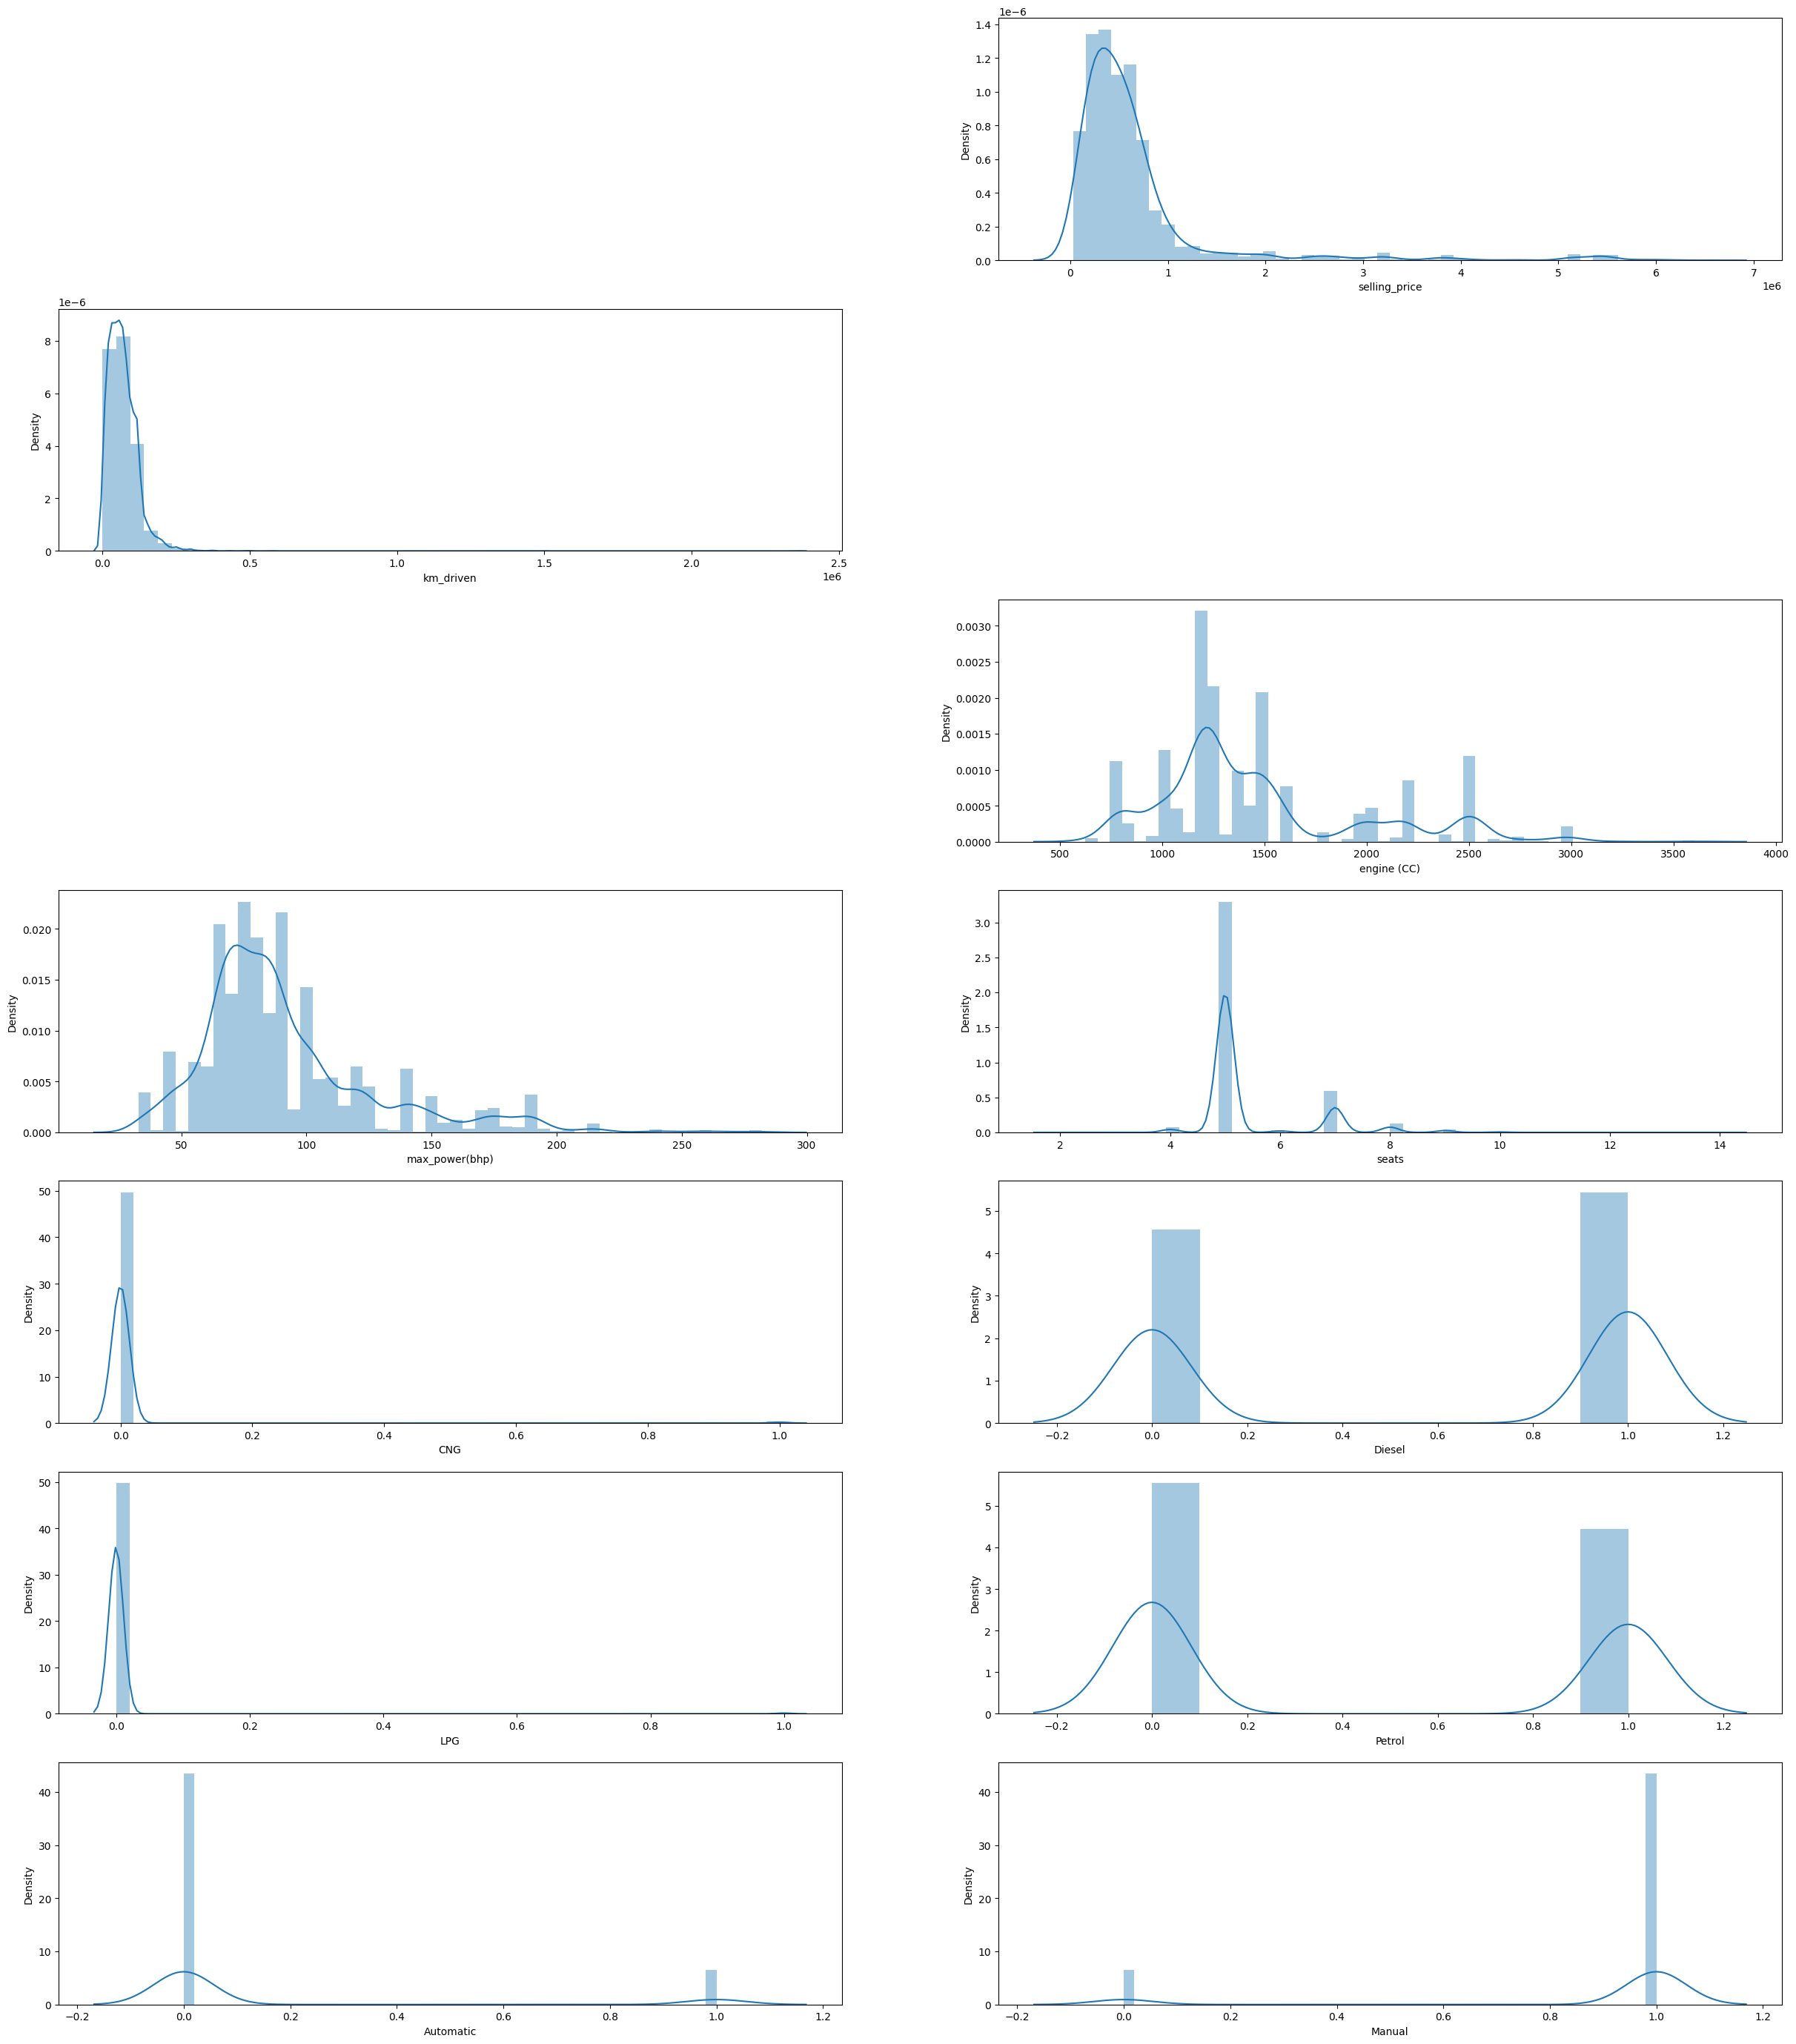

In [414]:
plt.figure(figsize=(30,45))

for i, column in enumerate(df_processed.columns):
    if df_processed[column].dtype!= 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.distplot(df_processed[column], ax = ax)
        plt.xlabel(column)
plt.show()

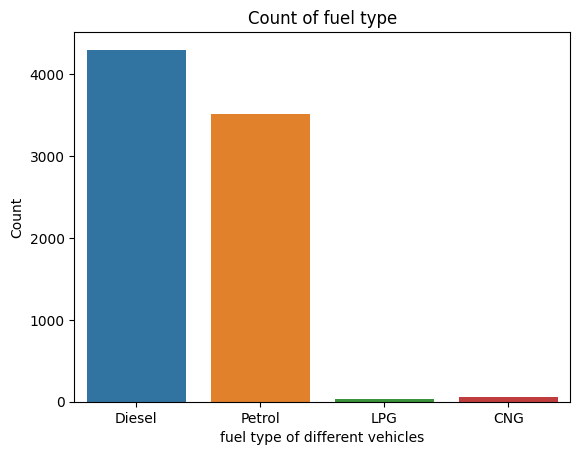

In [375]:
sns.countplot(data=df_processed, x='fuel')
plt.xlabel('fuel type of different vehicles')
plt.ylabel('Count')
plt.title('Count of fuel type')
plt.show()

In [417]:
## bins for selling price
import numpy as np

bins = np.linspace(min(df_processed['selling_price']), max(df_processed['selling_price']), 5)
group_names = [f'{bins[0]}:{bins[1]}', f'{bins[1]}:{bins[2]}', f'{bins[2]}:{bins[3]}', f'{bins[3]}:{bins[4]}']
df_processed['prices_binned'] = pd.cut(df['selling_price'], bins, labels=group_names, include_lowest= True)

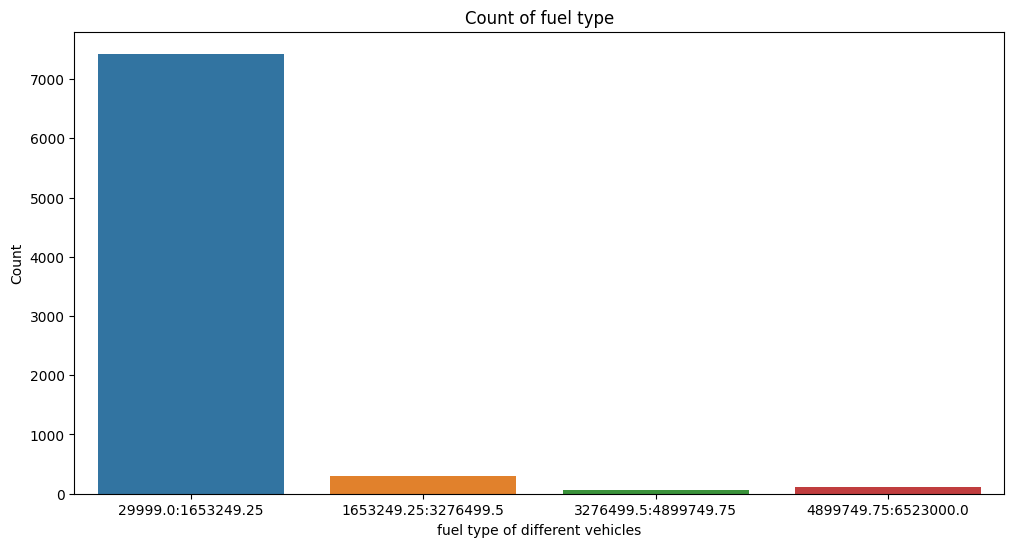

In [426]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_processed, x='prices_binned')
plt.xlabel('fuel type of different vehicles')
plt.ylabel('Count')
plt.title('Count of fuel type')
plt.show()

Bivariate Ananlysis:

Text(0, 0.5, 'selling price')

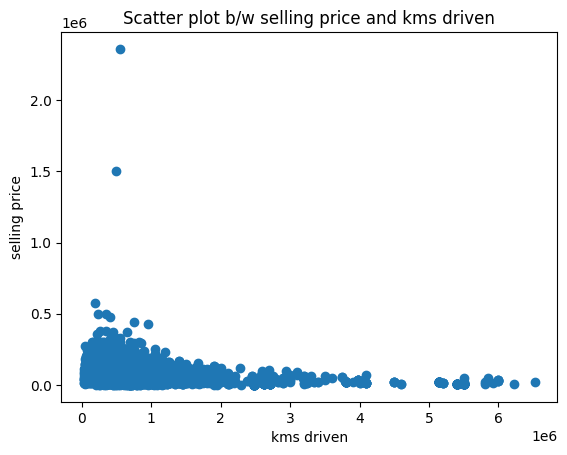

In [419]:
y = df_processed['km_driven']
x =  df_processed['selling_price']
plt.scatter(x,y)
plt.title('Scatter plot b/w selling price and kms driven')
plt.xlabel('kms driven')
plt.ylabel('selling price')

In [422]:
df_processed.head(1)

,name,selling_price,km_driven,fuel,transmission,engine (CC),max_power(bhp),seats,CNG,Diesel,LPG,Petrol,Automatic,Manual,prices_binned
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Manual,1248.0,74.0,5.0,False,True,False,False,False,True,29999.0:1653249.25


C:\Users\sjasm\AppData\Local\Temp\ipykernel_7804\2570403931.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_processed[df_processed['transmission'] == 'Manual']['selling_price'], label='Manual', shade=True, color='blue')
C:\Users\sjasm\AppData\Local\Temp\ipykernel_7804\2570403931.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_processed[df_processed['transmission'] == 'Automatic']['selling_price'], label='Automatic', shade=True, color='red')


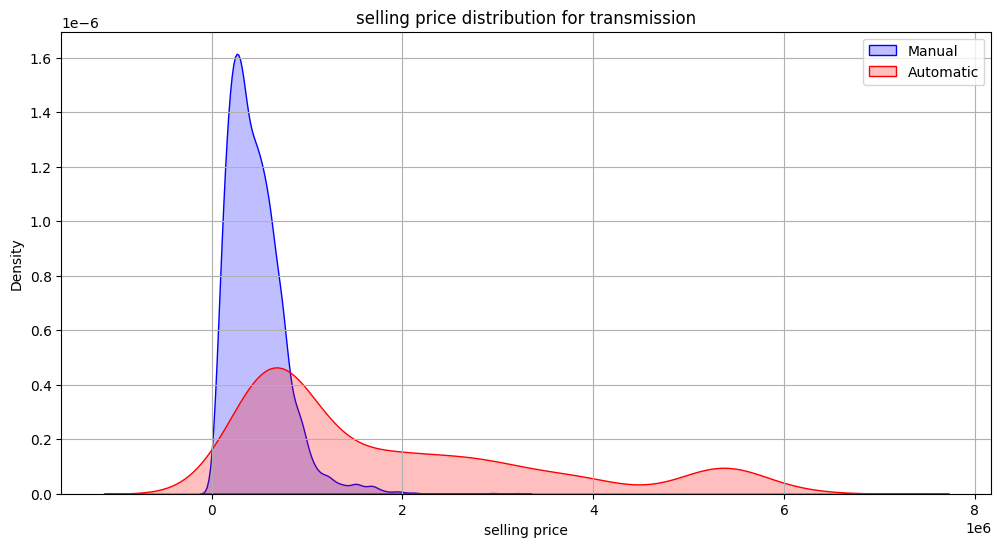

In [425]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_processed[df_processed['transmission'] == 'Manual']['selling_price'], label='Manual', shade=True, color='blue')
sns.kdeplot(data=df_processed[df_processed['transmission'] == 'Automatic']['selling_price'], label='Automatic', shade=True, color='red')
plt.xlabel('selling price')
plt.ylabel('Density')
plt.title('selling price distribution for transmission')
plt.legend()
plt.grid(True)
plt.show()